# NLTK and Sentiment Analysis

## What is NLTK?

NLTK (Natural Language Toolkit) is a leading Python platform for working with human language data. It provides interfaces to corpora, lexical resources, and a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

## What is Sentiment Analysis?

Sentiment Analysis (Opinion Mining) is an NLP technique to determine the emotional tone in text, identifying whether sentiment is positive, neutral, or negative.

**Key Applications**:
- Social media monitoring
- Customer feedback analysis
- Market research
- Political analysis
- Product reviews analysis

## Data Preprocessing Techniques

### 1. Tokenization

**Definition**: Breaking text into individual words, phrases, or other meaningful elements.

**Examples**:
- "I love this product!" → ["I", "love", "this", "product", "!"]

**When to use**: Always the first step in any NLP pipeline.

**SOTA Approaches**:
- **NLTK's tokenizers**: Good baseline for English
- **SpaCy's tokenizer**: More accurate, handles multiple languages
- **Hugging Face tokenizers**: Fast and optimized for transformer models
- **SentencePiece**: Subword tokenization, language-agnostic

### 2. Word Embeddings

**Definition**: Dense vector representations of words that capture semantic meaning.

**Types and when to use**:

1. **Word2Vec**
   - **How it works**: Neural network that learns word associations from text
   - **Types**: 
     - CBOW (Continuous Bag of Words): Predicts target word from context
     - Skip-gram: Predicts context words from target word
   - **When to use**: 
     - When you have domain-specific text and want to capture semantic relationships
     - For medium-sized datasets (millions of words)
     - When you need interpretable word similarities

2. **GloVe (Global Vectors)**
   - **How it works**: Count-based model that leverages global word-word co-occurrence statistics
   - **When to use**:
     - When you want pre-trained vectors (trained on Wikipedia, Twitter, etc.)
     - For capturing global statistical information in corpus
     - When interpretability of word relationships is important

3. **FastText**
   - **How it works**: Extension of Word2Vec that treats each word as composed of character n-grams
   - **When to use**:
     - For morphologically rich languages
     - When dealing with rare words or misspellings
     - When you need to generate embeddings for out-of-vocabulary words

4. **Contextual Embeddings (BERT, ELMo, etc.)**
   - **How it works**: Generate different vectors for the same word based on context
   - **When to use**:
     - When context is crucial for understanding meaning
     - For polysemous words (words with multiple meanings)
     - State-of-the-art performance for most NLP tasks
     - When you have computational resources to handle them

**SOTA Approach**: Contextual embeddings from transformer models (BERT, RoBERTa) are the current state-of-the-art for most tasks, but traditional Word2Vec or GloVe may be sufficient for simpler applications with resource constraints.

### 3. Stop Word Removal

**Definition**: Filtering out common words that typically don't carry significant meaning.

**When to use**: 
- For reducing dimensionality and focusing on content words
- When creating bag-of-words or TF-IDF representations
- NOT recommended for sentiment analysis where negations (often stop words) are crucial

### 4. Stemming and Lemmatization

**Stemming**: Reducing words to their root form (often creating non-words)
- "running", "runner", "ran" → "run"
- Fast but imprecise

**Lemmatization**: Reducing words to dictionary base form
- "better" → "good", "was" → "be"
- More accurate but slower

**When you MUST use stemming/lemmatization**:
- **Working with small datasets**: Helps reduce vocabulary size and sparsity
- **Using traditional bag-of-words or TF-IDF models**: Critical for connecting related word forms
- **Information retrieval systems**: Improves matching between queries and documents
- **Topic modeling**: Helps aggregate related terms for more coherent topics
- **Text classification with limited training data**: Reduces feature space and improves generalization
- **When building custom word frequency features**: Consolidates counts of word variants
- **Processing highly inflected languages** (Russian, Finnish, etc.): Essential for handling rich morphology

**When you can SKIP stemming/lemmatization**:
- **Using pre-trained word embeddings** (Word2Vec, GloVe): These already capture semantic similarity
- **Working with transformer models** (BERT, RoBERTa): These models use subword tokenization and contextual representations
- **For sentiment analysis using lexicon-based methods**: Many sentiment lexicons already cover word variants
- **Short text classification** (tweets, product names): Limited benefit when texts are already short
- **When processing speed is critical**: Skip if preprocessing overhead outweighs benefits
- **When working with very large datasets**: Neural models can learn word relationships without explicit normalization
- **When word form carries important meaning**: Tense, plurality, or other grammatical features may be relevant signals

**SOTA Approach**: When needed, lemmatization with correct part-of-speech information (as in SpaCy or NLTK with WordNet) is preferred for most applications. For transformer-based pipelines, stemming/lemmatization is generally unnecessary as the models handle word variations internally through subword tokenization and contextual learning.

### 5. Case Normalization and Special Character Handling

**When to use**: Most general text preprocessing pipelines, but be cautious with sentiment analysis as punctuation and capitalization can indicate emphasis.

## Main Approaches to Sentiment Analysis

### 1. Lexicon-Based Methods

**How it works**: Uses dictionaries of words with pre-assigned sentiment scores.

**Popular lexicons**:
- **VADER**: Optimized for social media; Words in its lexicon are assigned sentiment intensity scores ranging from -4 (extremely negative) to +4 (extremely positive)
- **SentiWordNet**: An extension of WordNet that adds sentiment information to the WordNet synsets
- **AFINN**: Simple word list with scores from -5 to +5
- **TextBlob**: Simple word list with scores from -1 to +1

**Best use cases**:
- No labeled data available
- Need for transparency and interpretability
- Fast processing required
- Straightforward sentiment expressions

**Limitations**:
- Cannot capture context-dependent meanings
- Struggles with sarcasm, irony, and implicit sentiment

### 2. Machine Learning Models

**How it works**: Statistical algorithms trained on labeled data.

**Common algorithms**:
- **Naive Bayes**: Fast, works well with text features
- **SVM**: Effective for high-dimensional text data
- **Random Forest**: Robust ensemble method
- **Logistic Regression**: Interpretable linear model

**Feature representations**:
- **Bag of Words/TF-IDF**: Traditional approaches
- **Word Embeddings**: More semantic information
- **N-grams**: Capture phrases and context

**Best use cases**:
- When you have labeled data (reviews with ratings)
- For domain-specific language patterns
- When balance between performance and interpretability is needed

**SOTA Approach**: Ensemble methods combining SVM or XGBoost with word embeddings features provide the best traditional ML approach.

### 3. Pre-trained Transformer Models

**How it works**: Leverage large language models pre-trained on massive corpora.

**Popular models**:
- **BERT**: Bidirectional context
- **RoBERTa**: Optimized BERT training
- **DistilBERT**: Lightweight BERT
- **GPT family**: Generative models

**Ways to use**:
- **Fine-tuning**: Adapt the model to your sentiment task
- **Feature extraction**: Use embeddings as features
- **Zero-shot learning**: Use without task-specific training

**Best use cases**:
- Complex texts with nuanced sentiment
- Dealing with sarcasm, irony, or implicit sentiment
- When accuracy is critical and resources are available

**SOTA Approach**: Fine-tuned RoBERTa or domain-adapted BERT models currently achieve state-of-the-art results on most benchmark sentiment analysis tasks.

## How to choose suitable framework for a problem at hand?

### When You Don't Have Labels

1. **Lexicon-Based Approaches**:
   - Use VADER for social media and short reviews
   - Create domain-specific lexicons for specialized domains
   - Implement rules for negation, intensifiers, and punctuation

2. **Semi/Self-Supervised Learning**:
   - Label a small subset manually, then expand
   - Use distant supervision (star ratings, keywords)
   - Leverage transfer learning from similar domains

3. **Zero-Shot Classification with Transformers**:
   - Prompt large language models to classify without specific training
   - Few-shot learning with example patterns
   - Self-supervised approaches with clustering

### Choose Based On:

1. **Data availability**:
   - No labels → Lexicon-based or zero-shot transformers
   - Some labels → Semi-supervised or fine-tuned transformers
   - Many labels → Full ML or transformer fine-tuning

2. **Text complexity**:
   - Simple, direct expressions → Lexicon-based methods
   - Domain-specific language → Custom ML models
   - Complex, contextual sentiment → Transformers

3. **Resource constraints**:
   - Limited computing → Lexicon-based or simple ML
   - Adequate resources → Fine-tuned transformers
   - Need for real-time analysis → Optimized, distilled models

4. **Need for interpretability**:
   - High transparency needed → Lexicon-based or simple ML
   - Performance over explanation → Transformers


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
import matplotlib as mpl
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # VADER lexicon for sentiment analysis

# Set style for plots
sns.set_style("whitegrid")
warnings.filterwarnings('ignore') 

# Define custom params for plots
rcParams = {
    'font.size': 20,                # all font sizes in plot
    'font.weight': 'bold',          # bold all fonts
    'figure.titleweight': 'bold',   # bold supertitle
    'axes.labelweight': 'bold',     # bold x and y labels
    'axes.linewidth': 3,            # linewidth for axes
    'xtick.major.width': 3,         # width for major ticks on x-axis
    'ytick.major.width': 3,         # width for major ticks on y-axis
    'axes.spines.top': True,
    'axes.spines.right': True,
    'lines.linewidth': 3,
    'legend.fontsize': 'large',
    'xtick.labelsize': 20,          # sets x-tick font size
    'ytick.labelsize': 20,          # sets y-tick font size
    'axes.titlepad': 20,            # spacing between title and figure
    'axes.facecolor': 'white',      # background color for axes
    'axes.titlesize': 20,           # title font size for axes
    'axes.titleweight': 'bold'      
}

# Update rcparams
mpl.rcParams.update(rcParams) 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Function to load data
def load_data(file_path: str) -> pd.DataFrame:
    try:
        data = pd.read_csv(file_path, encoding= 'unicode_escape')
        return data
    except FileNotFoundError:
        return None

# Example usage
df = load_data(r"./dataset/flipkart_product.csv")

# Show first 5 rows of the dataframe
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [4]:
# Examine if null values exist in the dataframe
print("Null values summary:\n", df.isnull().sum(), end = "\n\n")

# Drop rows with null values
df.dropna(inplace = True)

#Print shape of the dataframe
print("Shape of the dataframe:", df.shape)

# Check null values again
print("Null values summary after dropna():\n", df.isnull().sum(), end = "\n\n")

Null values summary:
 ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

Shape of the dataframe: (189857, 5)
Null values summary after dropna():
 ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64



In [5]:
from collections import Counter
Counter([word for line in df['Summary'] for word in line.split()]).most_common(100)

[('product', 43467),
 ('is', 42435),
 ('Good', 35937),
 ('good', 34357),
 ('and', 31423),
 ('for', 25780),
 ('the', 25477),
 ('Nice', 22347),
 ('Very', 21084),
 ('very', 20162),
 ('it', 19311),
 ('to', 19061),
 ('this', 16874),
 ('quality', 16699),
 ('I', 15586),
 ('in', 14277),
 ('of', 14078),
 ('not', 13809),
 ('nice', 13340),
 ('a', 12802),
 ('but', 10551),
 ('with', 9494),
 ('you', 7442),
 ('was', 6470),
 ('price', 5988),
 ('as', 5951),
 ('money', 5837),
 ('buy', 5803),
 ('so', 5453),
 ('product.', 5320),
 ('Super', 5230),
 ('are', 5209),
 ('Best', 5001),
 ('bad', 4997),
 ('one', 4957),
 ('my', 4927),
 ('on', 4882),
 ('Not', 4850),
 ('Product', 4692),
 ('The', 4608),
 ('have', 4518),
 ('best', 4409),
 ("It's", 4373),
 ('at', 4359),
 ('like', 4335),
 ('also', 4259),
 ('It', 4185),
 ("it's", 3948),
 ('from', 3829),
 ('after', 3825),
 ('Excellent', 3768),
 ('working', 3701),
 ('i', 3668),
 ('Awesome', 3638),
 ('am', 3613),
 ('can', 3495),
 ('Flipkart', 3488),
 ('This', 3455),
 ('that'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


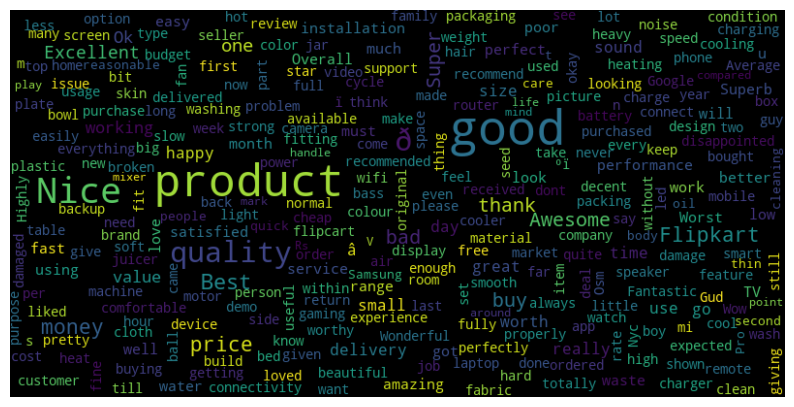

In [6]:
# Import required libraries
from wordcloud import WordCloud  # pip install wordcloud
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

# Generate a WordCloud plot
text = ' '.join(word for word in df['Summary'] if word not in stop_words)
wordcloud = WordCloud(width = 800, height = 400, max_font_size = 50,
            max_words = 300, collocations = False).generate(text)

# Generate plot
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('WordCloud.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [7]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

### VADER Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for social media text and informal language. It's optimized for short texts containing slang, emojis, and abbreviations.

### Key Features
- Pre-built for social media content
- Handles punctuation, capitalization, intensifiers, and negations
- Works without training data
- Part of NLTK library in Python

### Output Components
VADER produces four key sentiment scores:

1. **Positive (pos)**: Proportion of text with positive sentiment (0 to 1)
2. **Negative (neg)**: Proportion of text with negative sentiment (0 to 1)
3. **Neutral (neu)**: Proportion of text with neutral sentiment (0 to 1)
4. **Compound**: Normalized aggregate score (-1 to +1)

### Classification Thresholds
The compound score is used to determine overall sentiment:

- **Positive sentiment**: compound score ≥ 0.05
- **Neutral sentiment**: compound score between -0.05 and 0.05
- **Negative sentiment**: compound score ≤ -0.05

### Advantages of VADER
- No training required
- Fast and computationally efficient
- Handles informal language and social media text
- Interpretable results
- Accounts for intensifiers, punctuation, and negation

### Limitations
- Cannot capture context-dependent meanings
- Limited to the words in its lexicon
- Struggles with sarcasm and implicit sentiment

In [8]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Analyze text
text = "I love this product! It's amazing and works perfectly."
scores = sid.polarity_scores(text)

# Output
print(scores)

# Classify sentiment
if scores['compound'] >= 0.05:
    sentiment = "Positive"
elif scores['compound'] <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Sentiment: {sentiment}")  # Sentiment: Positive

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.9259}
Sentiment: Positive


In [9]:
# Function to get sentiment of a text
def get_sentiment(text: str, sid: SentimentIntensityAnalyzer = sid) -> str:
    """
    Function to get sentiment of a text
    Args:
    text: str: Text for which sentiment is to be calculated
    sid: SentimentIntensityAnalyzer: VADER SentimentIntensityAnalyzer object
    Returns:
    str: Sentiment of the text
    """
    scores = sid.polarity_scores(text)
    if scores.get('compound') >= 0.05:
        return "Positive"
    elif scores.get('compound') <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the function to the 'Review' column
df['Sentiment'] = df['Review'].apply(lambda x: get_sentiment(x) if pd.notnull(x) else 'None')

# Show first 5 rows with sentiment
df.head()

,ProductName,Price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,Positive
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,Positive
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,Positive
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,Negative
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,Positive


In [10]:
df.dropna().isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
Sentiment      0
dtype: int64

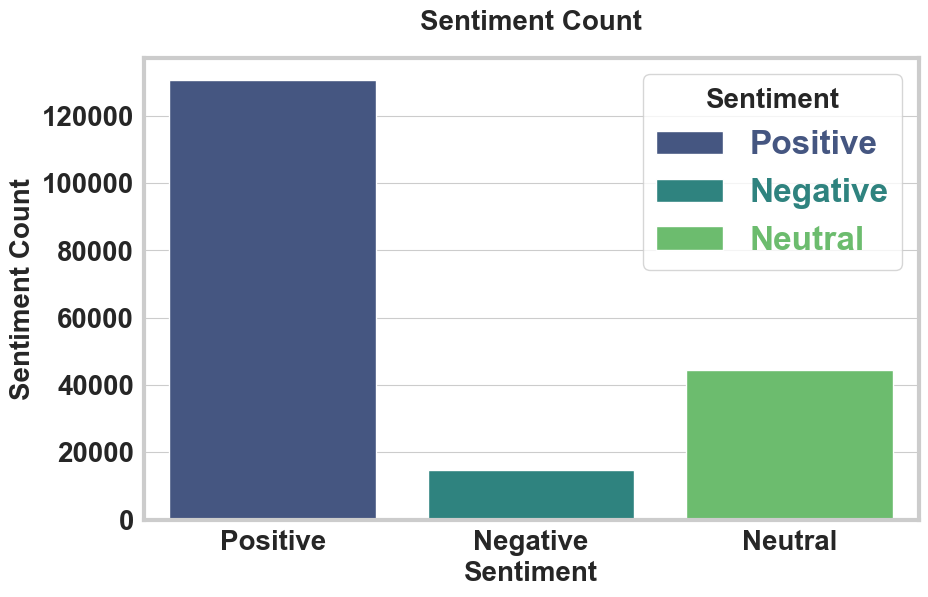

In [11]:
def plot_sentiment_count(df: pd.DataFrame) -> None:
    """
    Function to plot sentiment count
    Args:
    df: pd.DataFrame: Dataframe with sentiment column
    """
    sns.set_style('whitegrid')
    plt.figure(figsize = (10, 6))
    sns.countplot(x = 'Sentiment', data = df, hue = 'Sentiment', palette = 'viridis')
    plt.title('Sentiment Count')
    plt.legend(title = 'Sentiment', loc = 'upper right', 
    labels = ['Positive', 'Negative', 'Neutral'], labelcolor = 'linecolor')
    plt.ylabel("Sentiment Count")
    plt.xlabel("Sentiment")
    plt.show()

plot_sentiment_count(df)

## Product Recommendation Using Sentiment Analysis
We will load the data and validate the columns' data types. Using VADER, we will calculate sentiment scores for the reviews and summaries. An alternative approach could be using TextBlob. We will then analyze the relationship between price, sentiment scores, and ratings to recommend products. By understanding the sentiment and ratings, we can identify products that are highly rated and positively reviewed, providing better recommendations to users.

In [13]:
from dataclasses import dataclass
from typing import List
from collections import namedtuple

@dataclass
class SentimentDataLoader:
    filepath: str

    def load_data(self) -> pd.DataFrame:
        """
        Function to load data from a CSV file.
        Returns:
        pd.DataFrame: Loaded data as a DataFrame.
        """
        try:
            data = pd.read_csv(self.filepath, encoding='unicode_escape')
            return data
        except FileNotFoundError:
            return None

    # Define a namedtuple for column name and data type
    ColumnType = namedtuple('ColumnType', ['name', 'dtype'])

    # Define the expected schema
    expected_schema = [
        ColumnType(name='ProductName', dtype='object'),
        ColumnType(name='Price', dtype='float'),
        ColumnType(name='Rate', dtype='float'),
        ColumnType(name='Review', dtype='object'),
        ColumnType(name='Summary', dtype='object')
    ]

    def validate_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Function to validate and clean the data.
        Args:
        df: pd.DataFrame: DataFrame to be validated.
        Returns:
        pd.DataFrame: Validated and cleaned DataFrame.
        """
        def clean_and_convert_to_numeric(price_str):
            if isinstance(price_str, str):  # Check if the input is a string
                # Remove special characters regular expression
                cleaned_str = ''.join(e for e in price_str if e.isalnum() or e in ('.', '-'))
                
                # Convert the cleaned string to numeric
                try:
                    numeric_value = float(cleaned_str)
                    return numeric_value
                except ValueError:
                    return None  # Return None for values that couldn't be converted to numeric
            else:
                return price_str  # Return the input unchanged if it's already numeric

        if df is not None:

            # Clean and convert the 'Price' column to numeric
            for column in self.expected_schema:
                if column.name in df.columns:
                    if column.name == 'Price':
                        df[column.name] = df[column.name].str.replace('¹', '').apply(clean_and_convert_to_numeric)
                        df[column.name] = df[column.name] * 0.011  # Convert the price to USD
                    elif column.name == 'Rate':
                        df[column.name] = pd.to_numeric(df[column.name], errors='coerce')
                    else:
                        df[column.name] = df[column.name].astype(column.dtype)
                        
            # Drop rows with null values
            df.dropna(inplace = True)

            # Ensure the rating is between 1 to 5
            df = df[df.Rate.between(1, 5)]

            return df
        else:
            return None

    def get_sentiment(self, text: str, sid: SentimentIntensityAnalyzer = sid) -> str:
        """
        Function to get the sentiment of a text.
        Args:
        text: str: Text for which sentiment is to be calculated.
        sid: SentimentIntensityAnalyzer: VADER SentimentIntensityAnalyzer object.
        Returns:
        str: Sentiment of the text.
        """
        scores = sid.polarity_scores(text)
        if scores.get('compound') >= 0.05:
            return "Positive"
        elif scores.get('compound') <= -0.05:
            return "Negative"
        else:
            return "Neutral"

    def get_polarity_score(self, text: str, sid: SentimentIntensityAnalyzer = sid) -> float:
        """
        Function to get the polarity score of a text.
        Args:
        text: str: Text for which polarity score is to be calculated.
        sid: SentimentIntensityAnalyzer: VADER SentimentIntensityAnalyzer object.
        Returns:
        float: Polarity score of the text.
        """
        scores = sid.polarity_scores(text)
        return scores.get('compound', None)


In [14]:
# Create an instance of SentimentDataLoader
data_loader = SentimentDataLoader(filepath=r"./dataset/flipkart_product.csv")

# Load the data
data = data_loader.load_data()

# Validate the data
clean_data = data_loader.validate_data(data)

# Show first 5 rows with sentiment
clean_data.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,43.989,5.0,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,43.989,5.0,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,43.989,3.0,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,43.989,1.0,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,43.989,3.0,Fair,Ok ok product


In [15]:
clean_data.shape

(54378, 5)

In [56]:
class SentimentDataAnalyzer(SentimentDataLoader):

    def plot_sentiment_count(self, df: pd.DataFrame) -> None:
        """
        Function to plot sentiment count.
        Args:
        df: pd.DataFrame: Dataframe with sentiment column.
        """
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        sns.set_style('whitegrid')
        sns.countplot(x='Review_Sentiment', data=df, ax=axes[0], palette='viridis', order=['Negative', 'Neutral', 'Positive'])
        axes[0].set_title('Review Sentiment Counts')
        axes[0].spines[['left', 'bottom']].set_visible(False)
        y_max = df['Review_Sentiment'].value_counts().max() * 1.1  # Add 10% margin
        axes[0].set_ylim(0, y_max)
        axes[0].set_xlabel('')
        axes[0].set_ylabel('')
        axes[0].set_yticks([])
        for p in axes[0].patches:
            height = p.get_height()
            axes[0].text(p.get_x() + p.get_width() / 2., height + (y_max * 0.02), 
                 f'{int(height)} ({height/sum(df["Review_Sentiment"].value_counts())*100:.1f}%)', 
                 ha='center')
        
        sns.countplot(x='Summary_Sentiment', data=df, ax=axes[1], palette='viridis', order=['Negative', 'Neutral', 'Positive'])
        axes[1].set_title('Summary Sentiment Counts')
        axes[1].spines[['right', 'bottom']].set_visible(False)
        y_max = df['Summary_Sentiment'].value_counts().max() * 1.1  # Add 10% margin
        axes[1].set_ylim(0, y_max)
        axes[1].set_xlabel('')
        axes[1].set_ylabel('')
        axes[1].set_yticks([])
        for p in axes[1].patches:
            height = p.get_height()
            axes[1].text(p.get_x() + p.get_width() / 2., height + (y_max * 0.02), 
                 f'{int(height)} ({height/sum(df["Summary_Sentiment"].value_counts())*100:.1f}%)', 
                 ha='center')
        
        plt.suptitle('Sentiment Analysis Results using VADER', y=0.98)
        plt.tight_layout()
        plt.show()

    def plot_sentiment_distribution(self, df: pd.DataFrame) -> None:
        """
        Function to plot sentiment score distribution.
        Args:
        df: pd.DataFrame: Dataframe with sentiment score columns.
        """
        fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        sns.histplot(df['Review_Polarity_Score'], kde=True, ax=axes[0], color='blue', stat='percent')
        axes[0].set_title('Review Polarity Score Distribution')
        axes[0].set_ylabel('Sentiment Count [%]')
        axes[0].spines['right'].set_visible(False)
        sns.histplot(df['Summary_Polarity_Score'], kde=True, ax=axes[1], color='green', stat='percent')
        axes[1].set_title('Summary Polarity Score Distribution')
        sns.histplot(df['Weighted_Polarity_Score'], kde=True, ax=axes[2], color='red', stat='percent')
        axes[1].spines[['left', 'right']].set_visible(False)
        axes[2].set_title('Weighted Polarity Score Distribution')
        axes[2].spines['left'].set_visible(False)
        plt.tight_layout()
        plt.suptitle('Polarity Score Density by Review Types', y=1.02)
        plt.show()

    def plot_polarity_vs_price(self, df: pd.DataFrame) -> None:
        """
        Function to plot polarity score vs price.
        Args:
        df: pd.DataFrame: Dataframe with polarity score and price columns.
        """
        plt.figure(figsize=(12, 9))
        sns.scatterplot(x='Weighted_Polarity_Score', y = 'Price', data = df, hue = 'Weighted_Sentiment', 
                        palette='viridis')
        plt.title('Polarity Score vs Price')
        plt.xlabel('Weighted Polarity Score')
        plt.ylabel('Price')
        plt.legend(title='Sentiment', loc='upper right'
        , labelcolor='linecolor')
        plt.show()

    def plot_price_distribution(self, df: pd.DataFrame) -> None:
        """
        Function to plot price distribution by sentiment type.
        Args:
        df: pd.DataFrame: Dataframe with price and sentiment columns.
        """
        plt.figure(figsize = (12, 9))
        sns.boxplot(x = 'Weighted_Sentiment', y = 'Price', data = df, palette = 'viridis')
        plt.title('Price Distribution by Sentiment Type')
        plt.xlabel('Sentiment Type')
        plt.ylabel('Price')
        plt.legend(title = 'Sentiment', loc = 'upper right', labels =
        ['Positive', 'Negative', 'Neutral'], labelcolor = 'linecolor')
        plt.show()

    def plot_correlation(self, df: pd.DataFrame) -> None:
        """
        Function to plot correlation between price and sentiment score.
        Args:
        df: pd.DataFrame: Dataframe with price and sentiment score columns.
        """
        plt.figure(figsize = (12, 10))
        sns.heatmap(df[['Price', 'Review_Polarity_Score', 'Summary_Polarity_Score', 
                        'Weighted_Polarity_Score']].corr(), annot = True, cmap = 'viridis')
        plt.title('Correlation between Price and Sentiment Scores')
        plt.show()

    def plot_rating_pie_chart(self, df: pd.DataFrame) -> None:
        """
        Function to plot pie chart for rating distribution.
        Args:
        df: pd.DataFrame: Dataframe with rating column.
        """
        rating_counts = df['Rate'].replace({
            5: 'Excellent',
            4: 'Good',
            3: 'Average',
            2: 'Poor',
            1: 'Very Poor'
        }).value_counts().sort_index()
        plt.figure(figsize = (16, 12))
        plt.pie(rating_counts, labels = rating_counts.index, autopct = '%1.1f%%', startangle = 140)
        plt.title('Rating Distribution')
        plt.show()

    def plot_rating_vs_price(self, df: pd.DataFrame) -> None:
        """
        Function to plot hexplot for rating vs price.
        Args:
        df: pd.DataFrame: Dataframe with rating and price columns.
        """
        plt.figure(figsize = (10, 6))
        sns.scatterplot(x = 'Price', y = 'Rate', data=df, hue ='Weighted_Sentiment', palette='viridis')
        plt.title('Rating vs Price')
        plt.xlabel('Price')
        plt.ylabel('Rating')
        plt.legend(title='Sentiment', loc='upper right', labelcolor = 'linecolor')
        plt.show()

    def recommend_products(self, df: pd.DataFrame, N: int = 10) -> pd.DataFrame:
        """
        Function to recommend top N products based on sentiment scores.
        Args:
        df: pd.DataFrame: Dataframe with product details and sentiment scores.
        N: int: Number of top products to recommend.
        Returns:
        pd.DataFrame: Top N recommended products.
        """
        recommended_products = df.sort_values(by = 'Weighted_Polarity_Score', 
                                ascending = False)[['ProductName', 'Price']].head(N)
        return recommended_products

    def analyze_sentiment(self):
        """
        Function to analyze sentiment of the data.
        """
        # Load the data
        df = self.load_data()

        # Validate the data
        df = self.validate_data(df)

        # Get sentiment for each review
        df['Review_Polarity_Score'] = df['Review'].apply(lambda x: self.get_polarity_score(x) 
                                      if pd.notnull(x) else 'None')

        # Get sentiment for each summary
        df['Summary_Polarity_Score'] = df['Summary'].apply(lambda x: self.get_polarity_score(x) 
                                       if pd.notnull(x) else 'None')

        # Get average polarity score for reviews
        df['Weighted_Polarity_Score'] = 0.5 * df['Review_Polarity_Score'] + 0.5 * df['Summary_Polarity_Score']

        # Get sentiment for weighted polarity score
        df['Weighted_Sentiment'] = df['Weighted_Polarity_Score'].map(lambda x: 'Positive' 
                        if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

        # Add two more columns for sentiment
        df['Review_Sentiment'] = df['Review_Polarity_Score'].map(lambda x: 'Positive' 
                                if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))
        df['Summary_Sentiment'] = df['Summary_Polarity_Score'].map(lambda x: 'Positive' 
                                if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

        # Plot sentiment count
        self.plot_sentiment_count(df)

        # Plot sentiment distribution
        self.plot_sentiment_distribution(df)

        # Plot polarity score vs price
        self.plot_polarity_vs_price(df)

        # Plot price distribution by sentiment type
        self.plot_price_distribution(df)

        # Plot correlation between price and sentiment scores
        self.plot_correlation(df)

        # Plot pie chart for rating distribution
        self.plot_rating_pie_chart(df)

        # Plot hexplot for rating vs price
        self.plot_rating_vs_price(df)

        # Recommend top 10 products
        recommended_products = self.recommend_products(df, N = 10)
        print("Top 10 Recommended Products:")
        print(recommended_products)

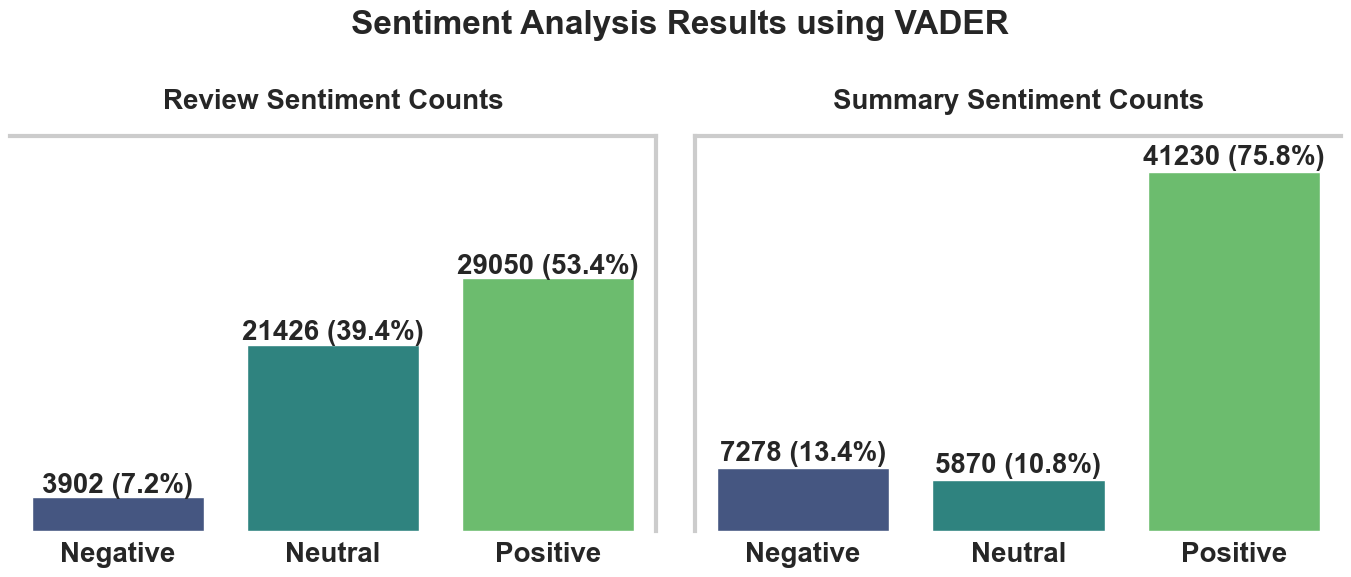

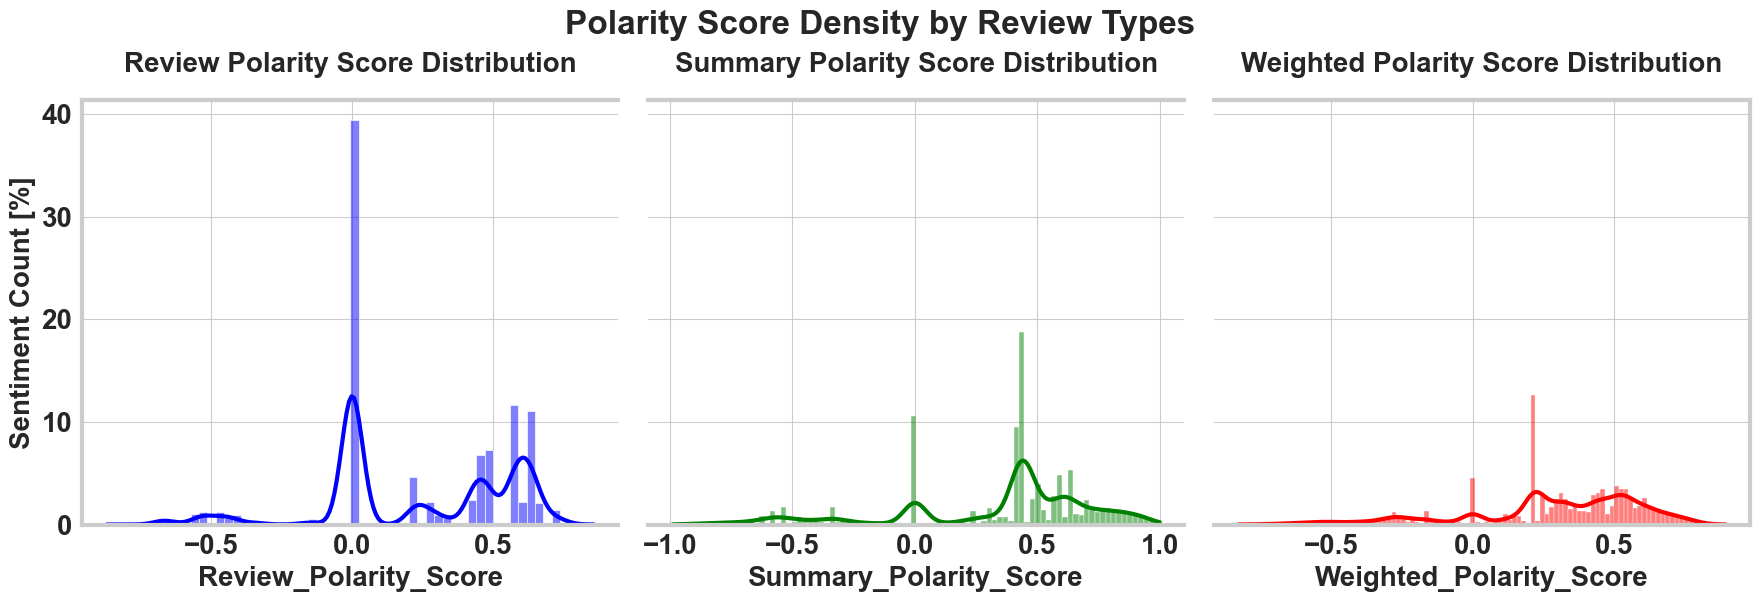

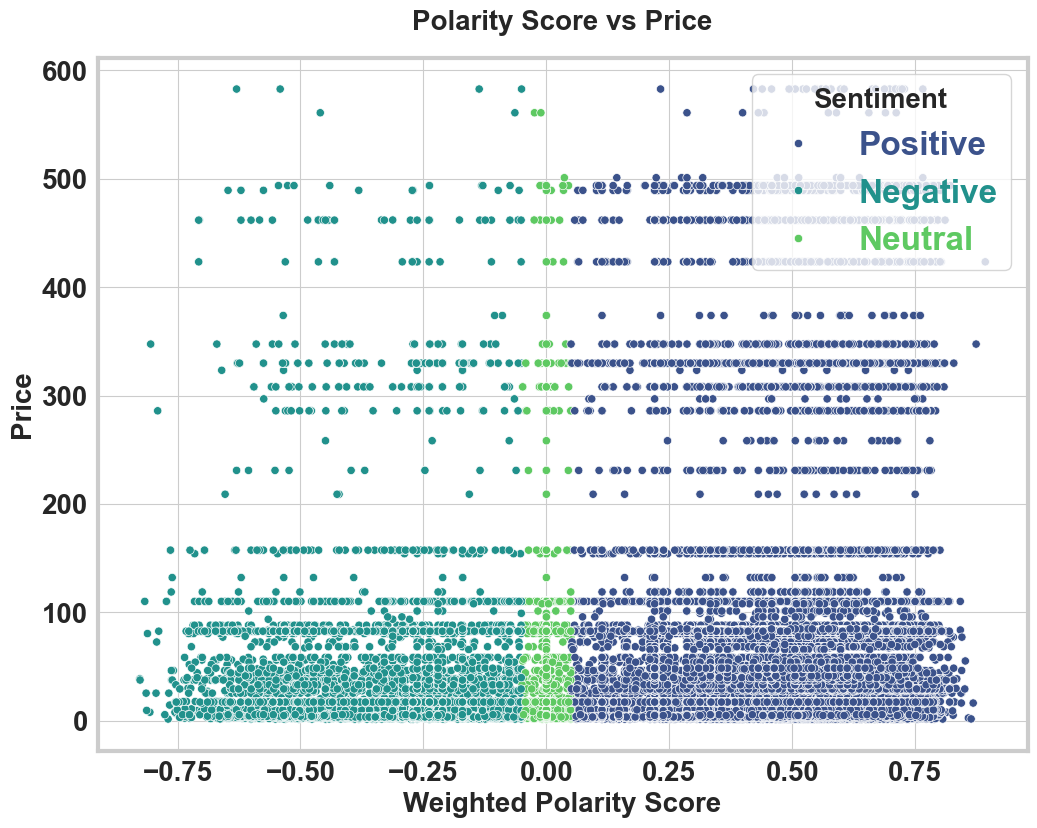

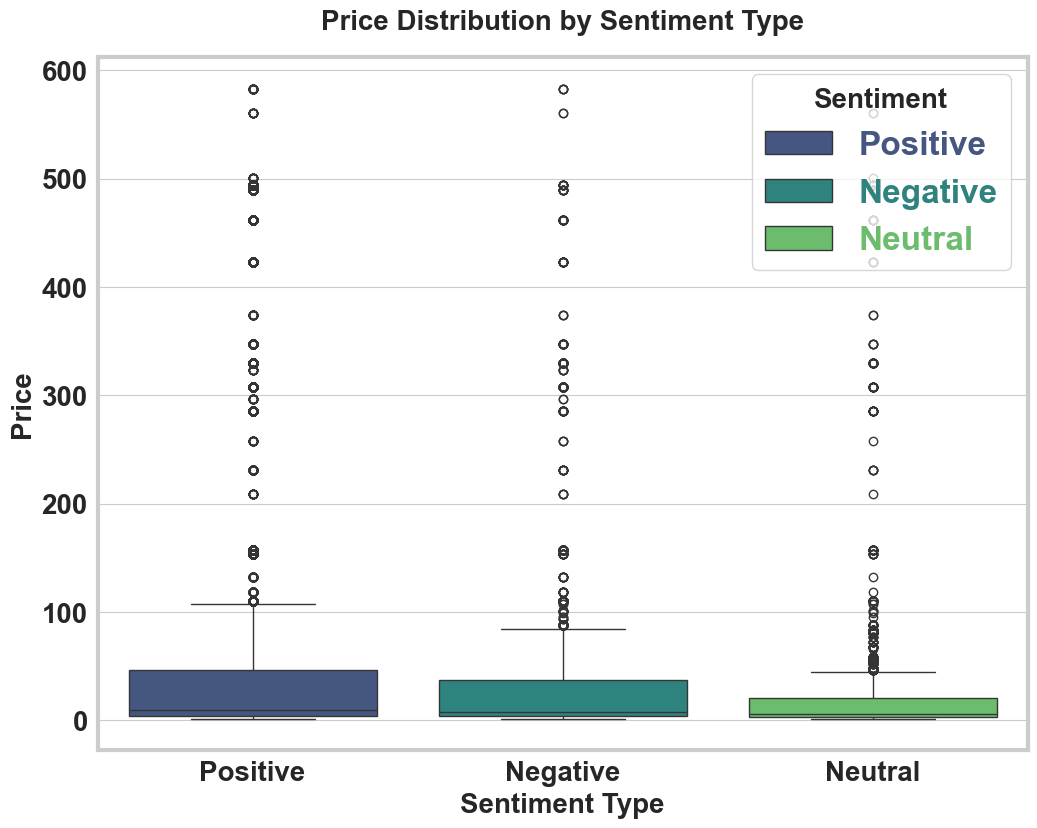

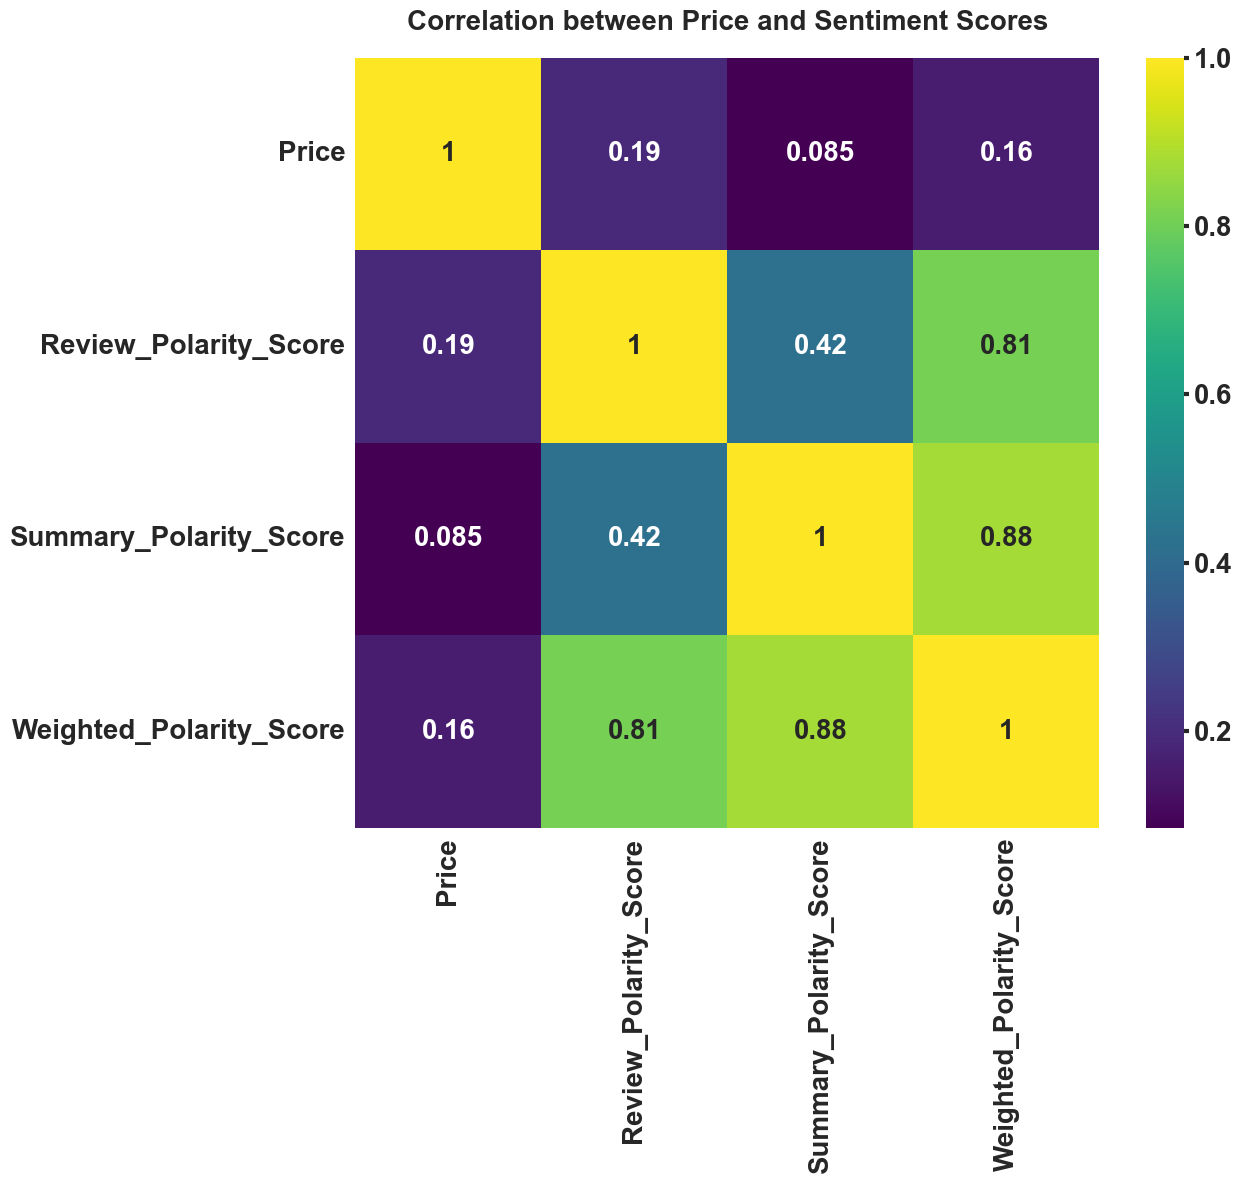

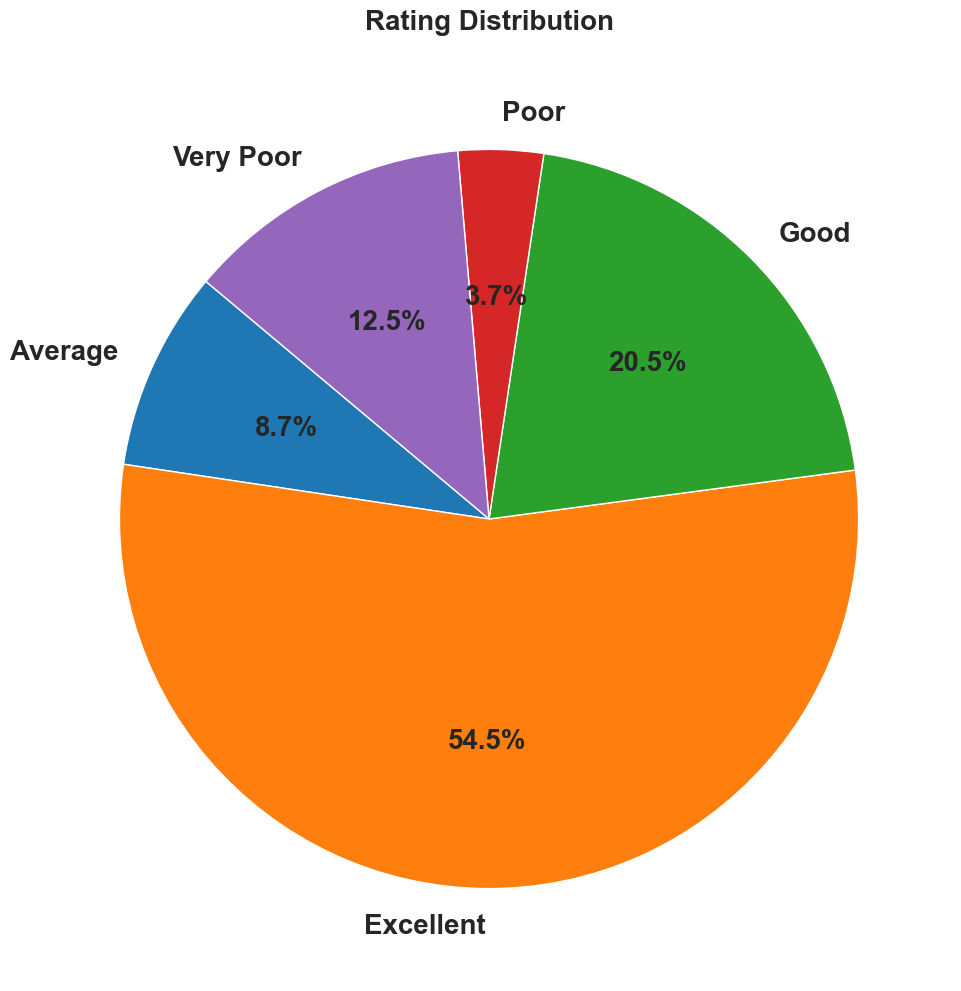

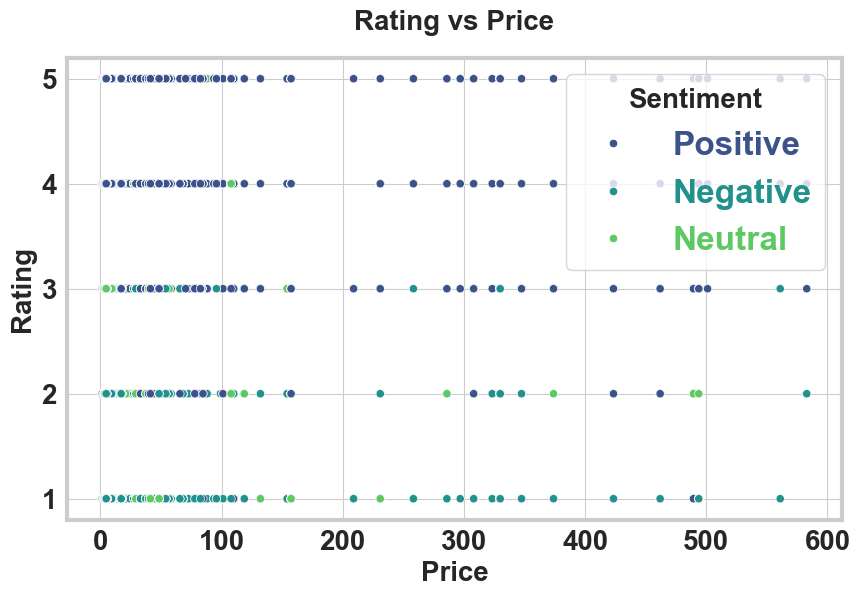

Top 10 Recommended Products:
                                              ProductName    Price
32378   IFB Neptune VX Free Standing 12 Place Settings...  423.390
32038   IFB Neptune SX1 Free Standing 15 Place Setting...  489.390
32970   Voltas Beko DF14W Free Standing 14 Place Setti...  347.490
148354  TP-Link TL-WA850RE(IN) 300 Mbps WiFi Range Ext...   16.159
132522  Hold up Triangle Shape Mobile Holder For Table...    1.496
37533   Airtel Regular Digital TV DTH Remote Compatibl...    2.365
186626    KENT 16079 - Wet Grinder Wet Grinder?ÿ?ÿ(White)   54.989
175307  Google Chromecast 3 Media Streaming Device?ÿ?ÿ...   29.161
60863   Google Nest Hub (2nd gen), Display with Google...   76.989
185423  Butterfly Rapid Plus Wet Grinder with Coconut ...   46.189


In [57]:
# Create an instance of SentimentDataAnalyzer
analyzer = SentimentDataAnalyzer(filepath=r"./dataset/flipkart_product.csv")

# Use the function defined above to make all the plots
analyzer.analyze_sentiment()

## Analysis of Sentiment and Price Relationship in Product Reviews

Based on the visualization data, here are the key findings:

### Sentiment Distribution Patterns

1. **Overall Sentiment is Predominantly Positive**: 
   - Image 1 shows that positive sentiment dominates across all review types (standard reviews, summaries, and weighted sentiment)
   - In regular reviews, approximately 53% are positive, 39% neutral, and only 7% negative
   - The weighted sentiment calculation shows an even stronger positive bias (~80%)

2. **Polarity Score Distribution** (Image 2):
   - Regular reviews show clustering at neutral (0.0) with distinct positive peaks at 0.5-0.6
   - Summary polarity scores are more distributed with stronger representation in positive territory
   - Weighted polarity shows a clear shift toward positive values with fewer neutral ratings

### Price-Sentiment Relationships

3. **Price vs Sentiment Correlation** (Image 3 & 5):
   - The correlation between price and sentiment scores is positive but weak (0.12-0.19)
   - Higher-priced items do show a slightly higher likelihood of positive sentiment
   - However, the scatter plot reveals that positive and negative reviews exist across all price points

4. **Price Distribution by Sentiment** (Image 4):
   - No dramatic price differences between sentiment categories
   - The boxplots show similar median prices for positive, negative, and neutral reviews
   - High-priced outliers exist in all sentiment categories

5. **Rating Distribution** (Image 6):
   - Exceptional positivity bias in ratings with 54.5% "Excellent" and 20.5% "Good"
   - Only 3.7% rated as "Poor" with 12.5% "Very Poor"
   - This confirms the positive skew observed in the sentiment analysis

6. **Rating vs Price** (Image 7):
   - High ratings (4-5) appear across the entire price spectrum
   - No clear pattern showing higher prices correlating strongly with higher ratings
   - Lower ratings (1-2) also occur at all price points

## Advanced Sentiment Analysis Using pre-trained BERT and RoBERTa from HuggingFace

Read more about RoBERTa and BERT from HuggingFace:
1. [RoBERTa - cardiffnlp/twitter-roberta-base-sentiment-latest](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest)
2. [BERT - nlptown/bert-base-multilingual-uncased-sentiment](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment)

We can use HuggingFace for NLP tasks using the following methods:
- **Pipeline**: Simplifies the process of using pre-trained models for various tasks.
- **Model/Tokenizer**: Load specific models and tokenizers for custom processing. Ensure the tokenizer uses the same tokenization method as the model.
- **Combine with PyTorch and TensorFlow**: Integrate HuggingFace models with popular deep learning frameworks.
- **Save and Load models**: Save fine-tuned models and load them for future use.
- **Use Models from Model Hub**: Access a wide range of pre-trained models available on the HuggingFace Model Hub.
- **Fine-tune existing LLMs**: Customize pre-trained models for specific tasks by fine-tuning them on your dataset.

Make sure to create a virtual environment and install:
1. PyTorch using [pytorch.org](https://pytorch.org/) and select the machine and version you want (please refer to pytorch_installation.png for reference: pip3 install torch torchvision torchaudio).
2. Install [transformers](https://huggingface.co/docs/transformers/installation) from HuggingFace: pip install transformers


### Differences between BERT and RoBERTa

| Feature | BERT | RoBERTa |
|---------|------|---------|
| **Tokenization** | Uses WordPiece tokenization | Uses Byte-Pair Encoding (BPE) |
| **Special Tokens** | `[CLS]` (101) at start, `[SEP]` (102) at end | `<s>` (0) at start, `</s>` (2) at end |
| **Vocabulary Size** | 30,000 tokens | 50,000 tokens |
| **Pre-training Data** | 16GB of text (BookCorpus + Wikipedia) | 160GB of text (includes CC-News, OpenWebText, Stories) |
| **Pre-training Approach** | Next Sentence Prediction (NSP) + Masked Language Modeling (MLM) | MLM only (no NSP) with dynamic masking |
| **Training Batch Size** | 256 sequences | 8K sequences |
| **Sentiment Outputs** | Typically binary (0=negative, 1=positive) | Often 3-class (0=negative, 1=neutral, 2=positive) |
| **Input Format** | `[CLS] sentence1 [SEP] sentence2 [SEP]` | `<s> sentence1 </s> </s> sentence2 </s>` |
| **Famous Derivatives** | DistilBERT, BioBERT, SciBERT, ClinicalBERT | XLM-RoBERTa, InfoBERT, DeBERTa |
| **Common Applications** | Google Search, BERT-based QA systems | Facebook AI applications, modern NLP benchmarks |
| **Performance** | Good baseline performance | Generally outperforms BERT on most benchmarks |
| **Training Efficiency** | Less computationally expensive | More computationally expensive, but better results |
| **Released By** | Google AI (2018) | Facebook AI (2019) |

## Example Token IDs

**BERT:**
```
input_ids: tensor([[101, 2307, 14976, ..., 2009, 102]])  
```

**RoBERTa:**
```
input_ids: tensor([[0, 19065, 12924, ..., 24, 2]])
```

#### Model Output Structure

**BERT (Binary Sentiment):**
```
logits: tensor([[-4.3827, 4.7491]])
predicted_class: 1 (Positive)
```

**RoBERTa (3-Class Sentiment):**
```
logits: tensor([[-2.0416, -1.0450, 4.0481]])
predicted_class: 2 (Positive)
```

In [1]:
# Import required libraries
from transformers import pipeline
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*symlinks.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*defaulted to distilbert.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*Truncation was not explicitly activated.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*Some weights of the model checkpoint.*")

# The pipeline function from HuggingFace simplifies the process of using pre-trained models for various NLP tasks.
# It automatically handles the following steps:
# 1. Loads the pre-trained model and tokenizer.
# 2. Tokenizes the input text.
# 3. Passes the tokenized input through the model.
# 4. Decodes the model's output into human-readable form.
# 5. Returns the final result in a structured format.

# Example usage of sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Analyze sentiment of a sample text
result = sentiment_pipeline("I love this product! It's amazing and works perfectly.")
print(result, end='\n\n')

# Example of text generation pipeline
text_generator = pipeline("text-generation", model="distilgpt2")
result = text_generator("Once upon a time", max_length=50, num_return_sequences=5)
print(result, end='\n\n')

# Example of named entity recognition pipeline
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")
result = ner_pipeline("My name is John and I live in London.")
print(result, end='\n\n')

# Example of question-answering pipeline
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")
result = qa_pipeline(context="Hugging Face is a company based in New York City.", 
                     question="Where is Hugging Face based?")
print(result, end='\n\n')

# Example of text summarization pipeline
summarization_pipeline = pipeline("summarization")
result = summarization_pipeline("Hugging Face is a company based in New York City. "
                                "They are known for their NLP models.", max_length=50)
print(result, end='\n\n')

# Example of translation pipeline
translation_pipeline = pipeline("translation_en_to_fr")
result = translation_pipeline("How are you?")
print(result, end='\n\n')

# Example of zero-shot classification pipeline
zero_shot_pipeline = pipeline("zero-shot-classification")
result = zero_shot_pipeline("I am looking for a new laptop", 
                            candidate_labels=["education", "technology", "politics"])
print(result, end='\n\n')

# Example of text classification pipeline
text_classification_pipeline = pipeline("text-classification")
result = text_classification_pipeline("I am looking for a new laptop")
print(result, end='\n\n')

# Example of feature extraction pipeline
feature_extraction_pipeline = pipeline("feature-extraction")
result = feature_extraction_pipeline("I am looking for a new laptop")
print(result, end='\n\n')

# Example of fill-mask pipeline
fill_mask_pipeline = pipeline("fill-mask")
result = fill_mask_pipeline("Hugging Face is a company based in <mask>.")
print(result, end='\n\n')

c:\Users\anita\Desktop\flipkart_products_review\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998775720596313}]



Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time of disaster and for the great cause of death of thousands of people, all the great things were going to be restored by this very day when it came to the future.\n\n\n\nWhat, of course, is the true'}, {'generated_text': 'Once upon a time, these two species of species evolved in a different way, with a new evolutionary strategy.\n\n\n\nThe new evolutionary strategy is described (1) using molecular tools (1) (2) (3) (4)'}, {'generated_text': 'Once upon a time when humanity was out of control, it began to do a great deal more. Unfortunately, when the first humans arrived in the world, they were unable to survive. In The Chronicles of the Old World, they encountered a new,'}, {'generated_text': "Once upon a time of our recent struggles, we have developed a culture of ‒somewhere along the line of those who value it the most. The one person we encounter (and most people are aware of — who they are) doesn't"}, {'generated_text': "Once upon a time I used my

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity': 'I-PER', 'score': np.float32(0.9984617), 'index': 4, 'word': 'John', 'start': 11, 'end': 15}, {'entity': 'I-LOC', 'score': np.float32(0.99807525), 'index': 9, 'word': 'London', 'start': 30, 'end': 36}]



Device set to use cpu
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9506568908691406, 'start': 35, 'end': 48, 'answer': 'New York City'}



Device set to use cpu
Your min_length=56 must be inferior than your max_length=50.
Your max_length is set to 50, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
c:\Users\anita\Desktop\flipkart_products_review\.venv\lib\site-packages\transformers\generation\utils.py:1432: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (50). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Hugging Face is a company based in New York City known for their NLP models . Hugging face is known for its NLP-powered models . The company is based out of New York and is based in the United States .'}]



Device set to use cpu
No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'translation_text': 'Comment êtes-vous?'}]



Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'I am looking for a new laptop', 'labels': ['technology', 'education', 'politics'], 'scores': [0.9839605689048767, 0.00822014082223177, 0.007819264195859432]}



Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-cased and revision 6ea8117 (https://huggingface.co/distilbert/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9986376166343689}]



Device set to use cpu
No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[[[0.3920997083187103, 0.15229560434818268, -0.09379260987043381, -0.16558608412742615, -0.353220671415329, -0.19507288932800293, 0.2967379689216614, -0.14996463060379028, 0.0579085648059845, -1.1063272953033447, -0.26348549127578735, 0.07525748759508133, -0.1693315953016281, -0.023302938789129257, -0.5862294435501099, -0.013326006941497326, 0.08378566801548004, 0.21867986023426056, -0.0037139952182769775, -0.27568331360816956, 0.08076704293489456, -0.27682581543922424, 0.5485214591026306, -0.1835392713546753, 0.25351157784461975, -0.006866708397865295, 0.436663955450058, 0.19621194899082184, -0.14797964692115784, 0.25865042209625244, -0.013460134156048298, 0.2602478265762329, -0.008045921102166176, 0.02366478182375431, -0.2297629714012146, 0.21043558418750763, -0.18222174048423767, -0.3712529242038727, -0.23511554300785065, -0.18270529806613922, -0.5841636657714844, 0.15957266092300415, 0.5744210481643677, -0.3325854241847992, -0.0789376050233841, -0.4852064251899719, 0.05956615507602

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.047722071409225464, 'token': 928, 'token_str': ' London', 'sequence': 'Hugging Face is a company based in London.'}, {'score': 0.02737005427479744, 'token': 1568, 'token_str': ' Chicago', 'sequence': 'Hugging Face is a company based in Chicago.'}, {'score': 0.025435706600546837, 'token': 2177, 'token_str': ' Toronto', 'sequence': 'Hugging Face is a company based in Toronto.'}, {'score': 0.025344904512166977, 'token': 3417, 'token_str': ' Seattle', 'sequence': 'Hugging Face is a company based in Seattle.'}, {'score': 0.024066545069217682, 'token': 2920, 'token_str': ' Singapore', 'sequence': 'Hugging Face is a company based in Singapore.'}]



## Looking behind the pipeline

The `pipeline` function from HuggingFace simplifies the process of using pre-trained models for various NLP tasks. It automatically handles the following steps:
1. Loads the pre-trained model and tokenizer.
2. Tokenizes the input text.
3. Passes the tokenized input through the model.
4. Decodes the model's output into human-readable form.
5. Returns the final result in a structured format.

#### Advantages of Using `pipeline`
- **Ease of Use**: Simplifies the process of using pre-trained models.
- **Quick Setup**: Requires minimal code to get started.
- **Consistency**: Ensures consistent preprocessing and postprocessing steps.

#### Why We Might Want to Do Things Manually
- **More Control**: Allows fine-tuning of various parameters such as padding length, max length, etc.
- **Customization**: Enables the use of custom tokenizers and models.
- **Optimization**: Provides the ability to optimize the model for specific tasks or datasets.
- **Debugging**: Easier to debug and understand each step of the process.

#### Manual Control Example
When doing things manually, you can:
- Load specific models and tokenizers.
- Set custom padding and truncation strategies.
- Control the maximum length of input sequences.
- Customize the preprocessing and postprocessing steps.

This approach is useful when you need more control over the model's behavior and want to optimize it for specific use cases.

In [ ]:
# We can either import the generic transformers library and specify the model/tokenizer we want later
# or we can directly import the specific tokenizer and model by name like:
# from transformers import BertTokenizer, BertForSequenceClassification
# (if TF is at the prefix, it means they are for TensorFlow)
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def analyze_sentiment_with_model(text: str, model_name: str) -> None:
    """
    Function to analyze sentiment of a text using a specified model.
    Args:
    text: str: Text to be analyzed.
    model_name: str: Name of the model to be used for analysis.
    """
    # Load the pre-trained model for sequence classification
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    # Load the tokenizer for the specified model
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Tokenize the input text, return as PyTorch tensors
    inputs = tokenizer(text, padding = True, truncation= True, max_length= 512, return_tensors = "pt")
    print("Tokenized input:", inputs, end="\n\n")

    # Pass the input tensors through the model for inference
    with torch.no_grad():
        outputs = model(**inputs)
        print("Model outputs:", outputs, end="\n\n")
        # Get the predicted class label
        predictions = F.softmax(outputs.logits, dim = 1)
        print("Predictions:", predictions, end="\n\n")
        labels = torch.argmax(predictions, dim = 1)
        print("Labels", labels, end="\n\n")

# Example usage
text = "Great cooler.. excellent air flow and for this price. It's so amazing and unbelievable. Just love it"
bert_model_name =   "distilbert-base-uncased-finetuned-sst-2-english"
roberta_model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Analyze sentiment using BERT model
print("Bert sentiment analysis: {0: negative, 1: neutral}")
analyze_sentiment_with_model(text, bert_model_name)

# Analyze sentiment using RoBERTa model
print("RoBERTa sentiment analysis:{0: negative, 1: neutral, 2: positive} ")
analyze_sentiment_with_model(text, roberta_model_name)

Bert sentiment analysis: {0: negative, 1: neutral}
Tokenized input: {'input_ids': tensor([[  101,  2307, 14976,  1012,  1012,  6581,  2250,  4834,  1998,  2005,
          2023,  3976,  1012,  2009,  1005,  1055,  2061,  6429,  1998, 23653,
          1012,  2074,  2293,  2009,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}

Model outputs: SequenceClassifierOutput(loss=None, logits=tensor([[-4.3827,  4.7491]]), hidden_states=None, attentions=None)

Predictions: tensor([[1.0816e-04, 9.9989e-01]])

Labels tensor([1])

RoBERTa sentiment analysis:{0: negative, 1: neutral, 2: positive} 
Tokenized input: {'input_ids': tensor([[    0, 19065, 12924,  7586,  4206,   935,  3041,     8,    13,    42,
           425,     4,    85,    18,    98,  2770,     8, 14011,     4,  1801,
           657,    24,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Model outputs:

Analyzing sentiment for 54378 rows using cpu...


100%|██████████| 544/544 [12:39:40<00:00, 83.79s/it]        


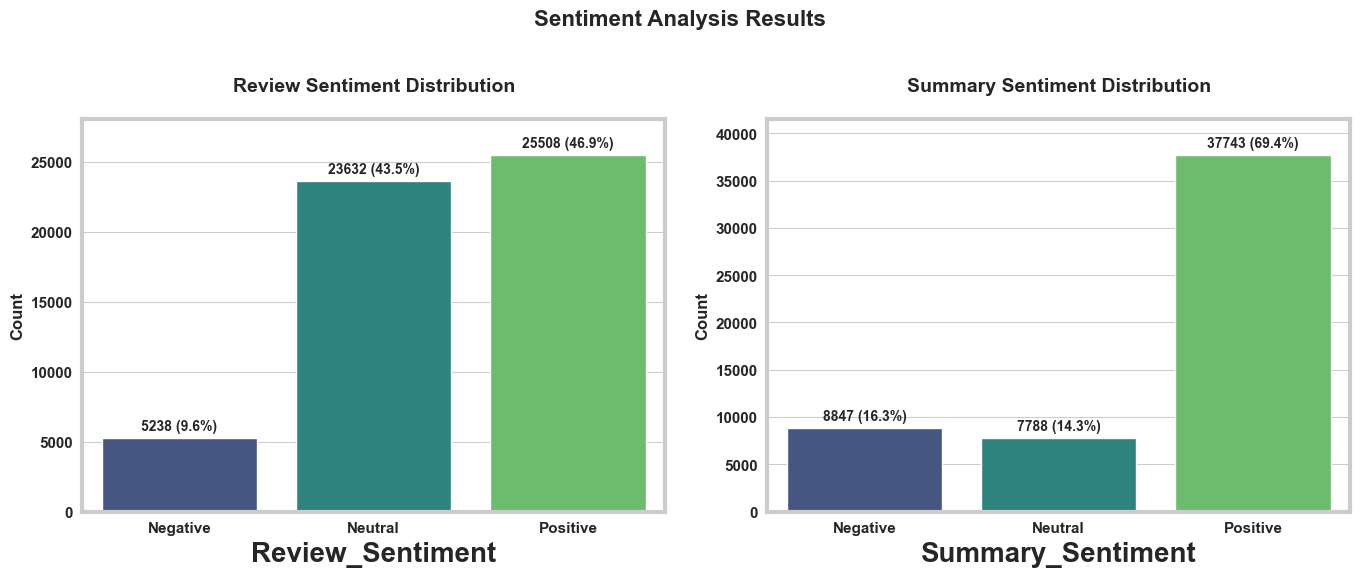

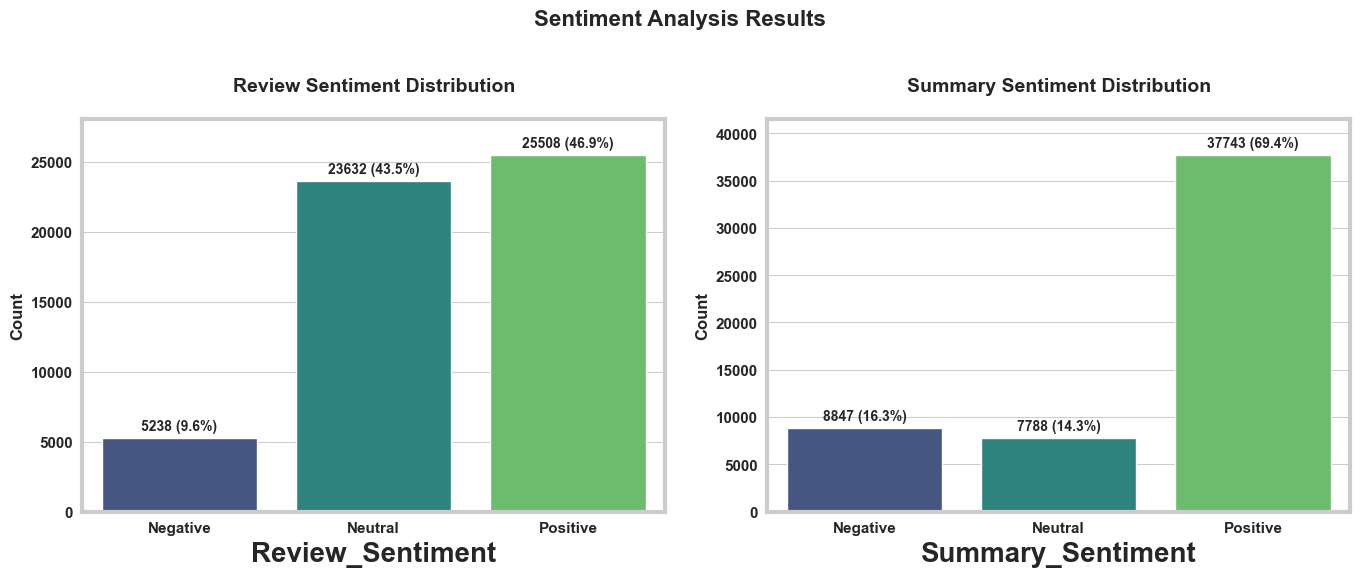

In [18]:
from dataclasses import dataclass, field
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from typing import Dict, List, Tuple, Optional
import json

@dataclass
class RoBERTASentimentAnalyzer:
    """A class for analyzing sentiment of text using RoBERTa model."""
    
    model_name: str = "cardiffnlp/twitter-roberta-base-sentiment"
    max_length: int = 512
    sentiment_map: Dict[int, str] = field(default_factory=lambda: {
        0: 'Negative', 
        1: 'Neutral', 
        2: 'Positive'
    })
    tokenizer: Optional[object] = None
    model: Optional[object] = None
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
    
    def __post_init__(self):
        """Initialize model and tokenizer after dataclass initialization."""
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(self.model_name).to(self.device)
    
    def predict_sentiment(self, text) -> Tuple[int, List[float]]:
        """Analyze sentiment of a single text."""
        # Use an empty string for invalid text instead of returning a special code
        if not isinstance(text, str) or len(text.strip()) == 0:
            text = " "  # Use space as default for empty text
        
        # Process text through model
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True, max_length=self.max_length)
        inputs = {k: v.to(self.device) for k, v in inputs.items()}
        
        with torch.no_grad():
            outputs = self.model(**inputs)
            scores = torch.nn.functional.softmax(outputs.logits, dim=1).cpu().numpy()[0]
        
        return np.argmax(scores), scores.tolist()
    
    def analyze_dataframe(self, df: pd.DataFrame, batch_size: int = 100) -> pd.DataFrame:
        """Analyze sentiment for Review and Summary columns in a dataframe.
           Uses batch processing for speed optimization."""
        # Create a copy to avoid modifying original
        result_df = df.copy()
        total_rows = len(result_df)
        
        # Initialize result columns
        if 'Review' in result_df.columns:
            result_df['Review_Sentiment_Class'] = pd.NA
            result_df['Review_Sentiment'] = pd.NA
            
        if 'Summary' in result_df.columns:
            result_df['Summary_Sentiment_Class'] = pd.NA
            result_df['Summary_Sentiment'] = pd.NA
        
        # Process in batches
        print(f"Analyzing sentiment for {total_rows} rows using {self.device}...")
        
        for start_idx in tqdm(range(0, total_rows, batch_size)):
            end_idx = min(start_idx + batch_size, total_rows)
            
            # Process Review column in batches
            if 'Review' in result_df.columns:
                reviews = result_df.iloc[start_idx:end_idx]['Review'].fillna(" ").tolist()
                review_results = [self.predict_sentiment(text) for text in reviews]
                
                result_df.iloc[start_idx:end_idx, result_df.columns.get_loc('Review_Sentiment_Class')] = [
                    int(cls) for cls, _ in review_results
                ]
                result_df.iloc[start_idx:end_idx, result_df.columns.get_loc('Review_Sentiment')] = [
                    self.sentiment_map[cls] for cls, _ in review_results
                ]
            
            # Process Summary column in batches
            if 'Summary' in result_df.columns:
                summaries = result_df.iloc[start_idx:end_idx]['Summary'].fillna(" ").tolist()
                summary_results = [self.predict_sentiment(text) for text in summaries]
                
                result_df.iloc[start_idx:end_idx, result_df.columns.get_loc('Summary_Sentiment_Class')] = [
                    int(cls) for cls, _ in summary_results
                ]
                result_df.iloc[start_idx:end_idx, result_df.columns.get_loc('Summary_Sentiment')] = [
                    self.sentiment_map[cls] for cls, _ in summary_results
                ]
        
        return result_df
    
    def plot_distributions(self, df: pd.DataFrame):
        """Visualize sentiment distributions for both Review and Summary."""
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Plot Review sentiment distribution
        if 'Review_Sentiment' in df.columns:
            review_counts = df['Review_Sentiment'].value_counts()
            # Ensure consistent order: Negative, Neutral, Positive
            ordered_labels = [label for label in ['Negative', 'Neutral', 'Positive'] 
                              if label in review_counts.index]
            review_counts = review_counts.reindex(ordered_labels)
            
            sns.barplot(x=review_counts.index, y=review_counts.values, ax=axes[0], palette='viridis')
            axes[0].set_title('Review Sentiment Distribution', fontsize=14)
            axes[0].set_ylabel('Count', fontsize=12)
            axes[0].tick_params(labelsize=11)
            
            # Add count labels
            y_max = review_counts.max() * 1.1  # Add 10% margin
            axes[0].set_ylim(0, y_max)
            for i, count in enumerate(review_counts.values):
                axes[0].text(i, count + (y_max * 0.02), f"{count} ({count/sum(review_counts)*100:.1f}%)", 
                           ha='center', fontsize=10)
            
        # Plot Summary sentiment distribution
        if 'Summary_Sentiment' in df.columns:
            summary_counts = df['Summary_Sentiment'].value_counts()
            # Ensure consistent order
            ordered_labels = [label for label in ['Negative', 'Neutral', 'Positive'] 
                              if label in summary_counts.index]
            summary_counts = summary_counts.reindex(ordered_labels)
            
            sns.barplot(x=summary_counts.index, y=summary_counts.values, ax=axes[1], palette='viridis')
            axes[1].set_title('Summary Sentiment Distribution', fontsize=14)
            axes[1].set_ylabel('Count', fontsize=12)
            axes[1].tick_params(labelsize=11)
            
            # Add count labels
            y_max = summary_counts.max() * 1.1  # Add 10% margin
            axes[1].set_ylim(0, y_max)
            for i, count in enumerate(summary_counts.values):
                axes[1].text(i, count + (y_max * 0.02), f"{count} ({count/sum(summary_counts)*100:.1f}%)", 
                           ha='center', fontsize=10)
        
        plt.suptitle('Sentiment Analysis Results', fontsize=16)
        plt.tight_layout()
        return fig
    
    def get_scores_distribution(self, df: pd.DataFrame) -> Dict:
        """Get distribution of sentiment scores."""
        results = {}
        
        if 'Review_Sentiment' in df.columns:
            results['Review'] = {
                'Negative': len(df[df['Review_Sentiment'] == 'Negative']),
                'Neutral': len(df[df['Review_Sentiment'] == 'Neutral']),
                'Positive': len(df[df['Review_Sentiment'] == 'Positive'])
            }
            
        if 'Summary_Sentiment' in df.columns:
            results['Summary'] = {
                'Negative': len(df[df['Summary_Sentiment'] == 'Negative']),
                'Neutral': len(df[df['Summary_Sentiment'] == 'Neutral']),
                'Positive': len(df[df['Summary_Sentiment'] == 'Positive'])
            }
            
        return results

# Usage example:
analyzer = RoBERTASentimentAnalyzer()
results_df = analyzer.analyze_dataframe(clean_data)
analyzer.plot_distributions(results_df)

In [60]:
def plot_sentiment_count(df: pd.DataFrame) -> None:
        """
        Function to plot sentiment count.
        Args:
        df: pd.DataFrame: Dataframe with sentiment column.
        """
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        sns.set_style('whitegrid')
        sns.countplot(x='Review_Sentiment', data=df, ax=axes[0], palette='viridis', order=['Negative', 'Neutral', 'Positive'])
        axes[0].set_title('Review Sentiment Counts')
        axes[0].spines[['left', 'bottom']].set_visible(False)
        y_max = df['Review_Sentiment'].value_counts().max() * 1.1  # Add 10% margin
        axes[0].set_ylim(0, y_max)
        axes[0].set_xlabel('')
        axes[0].set_ylabel('')
        axes[0].set_yticks([])
        for p in axes[0].patches:
            height = p.get_height()
            axes[0].text(p.get_x() + p.get_width() / 2., height + (y_max * 0.02), 
                 f'{int(height)} ({height/sum(df["Review_Sentiment"].value_counts())*100:.1f}%)', 
                 ha='center')
        
        sns.countplot(x='Summary_Sentiment', data=df, ax=axes[1], palette='viridis', order=['Negative', 'Neutral', 'Positive'])
        axes[1].set_title('Summary Sentiment Counts')
        axes[1].spines[['right', 'bottom']].set_visible(False)
        y_max = df['Summary_Sentiment'].value_counts().max() * 1.1  # Add 10% margin
        axes[1].set_ylim(0, y_max)
        axes[1].set_xlabel('')
        axes[1].set_ylabel('')
        axes[1].set_yticks([])
        for p in axes[1].patches:
            height = p.get_height()
            axes[1].text(p.get_x() + p.get_width() / 2., height + (y_max * 0.02), 
                 f'{int(height)} ({height/sum(df["Summary_Sentiment"].value_counts())*100:.1f}%)', 
                 ha='center')
        
        plt.suptitle('Sentiment Analysis Results using RoBERTa', y=0.98)
        plt.tight_layout()
        plt.show()

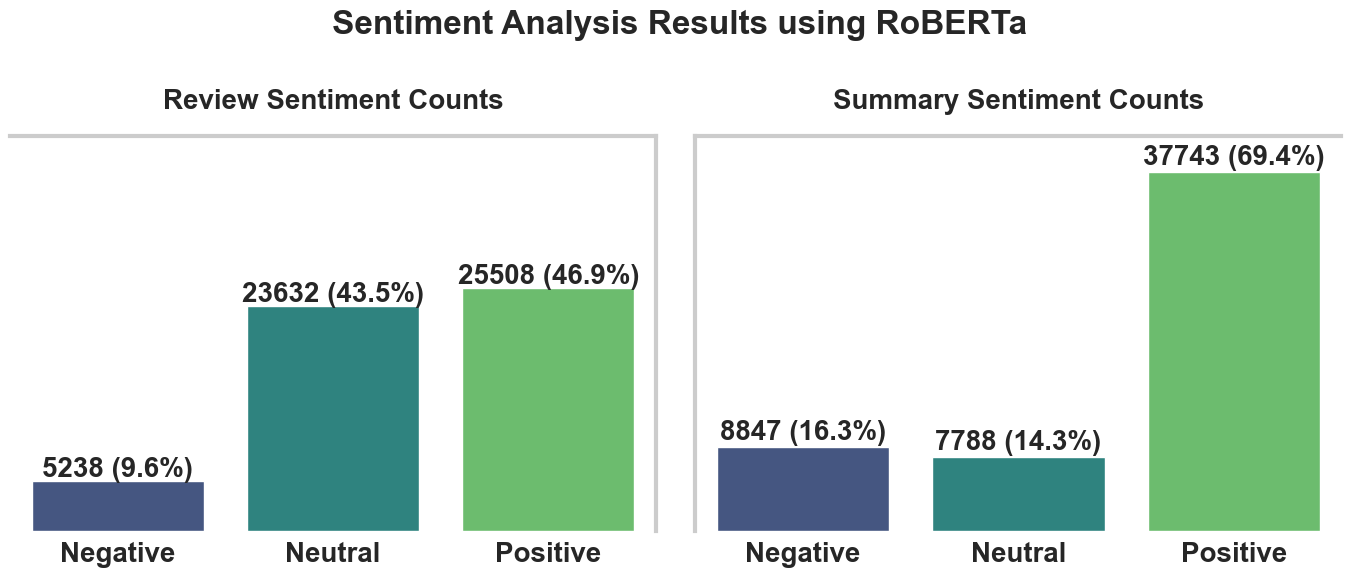

In [61]:
plot_sentiment_count(results_df)